## Prediction of novel materials for Li-ion battery

-- Predict the key properties of Li-based transition metal oxide, search for new candidates of Li-ion battery.

In [1]:
## import

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from IPython.display import display
from sklearn.decomposition import PCA
import re
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import dask_searchcv as dcv
from dask.diagnostics import ProgressBar
from sklearn.preprocessing import PolynomialFeatures
from __future__ import print_function
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

color_list = list(plt.rcParams['axes.prop_cycle'])
colors = [color_list[i]['color'] for i in range(len(color_list))]
pd.set_option("display.max_rows",200)

In [18]:
origin = pd.read_csv('data/final.csv')

origin = origin.rename(columns={"Materials Id": "Id",
                                "Formation Energy (eV)": "Ef",
                                "Spacegroup": "Sg",
                                "E Above Hull (eV)": "Eah",
                                "Band Gap (eV)": "Eg",
                                "Nsites": "Ns",
                                "Density (gm/cc)": "Density",
                                "Volume": "Vol",
                                "Crystal System": "Pg"}) # Point group
                                          
origin = origin.drop(["Count", "Has Bandstructure", "Unnamed: 12"], axis=1)
origin.sort_values(by='Formula')[1450:]

,Id,Formula,Sg,Ef,Eah,Eg,Ns,Density,Vol,Pg
1900,mp-769611,Li4V3CrO8,P1,-2.462,0.006,1.937,32,3.961,302.308,triclinic
1917,mp-768054,Li4V3CrO8,P1,-2.455,0.013,0.964,16,3.930,152.348,triclinic
1889,mp-776143,Li4V3CrO8,C2/m,-2.469,0.000,0.000,16,3.994,149.916,monoclinic
1904,mp-769615,Li4V3CrO8,P1,-2.462,0.007,0.000,32,3.949,303.251,triclinic
1918,mp-775729,Li4V3CrO8,P2/m,-2.455,0.014,0.986,16,3.939,152.017,monoclinic
2008,mp-772417,Li4V3Fe5O16,Cm,-2.166,0.065,0.996,28,4.068,292.173,monoclinic
2002,mp-780819,Li4V3FeO10,P4m2,-2.360,0.063,1.078,18,3.155,208.661,tetragonal
1984,mp-765701,Li4V3FeO8,R3m,-2.378,0.013,0.754,16,3.972,152.338,trigonal
2095,mp-773925,Li4V3NiO8,C2/m,-2.278,0.083,0.000,16,4.074,149.712,monoclinic
2160,mp-775320,Li4V3O8,R3,-2.450,0.068,1.723,15,3.369,152.089,trigonal


In [18]:
original_features=origin.columns

Index([u'Id', u'Formula', u'Sg', u'Ef', u'Eah', u'Eg', u'Ns', u'Density',
       u'Vol', u'Pg'],
      dtype='object')

In [23]:
## New features

# Number of Li, TM, O
N_Li=[]
N_TM=[]
N_O=[]
for i, formule in enumerate(origin.Formula.values):
    try:
        N_Li.append(int(formule[2:4]))
    except ValueError:
        try:
            N_Li.append(int(formule[2]))
        except ValueError:
            N_Li.append(1)
    elems = re.sub(r"[0-9()]+", "", formule)
    N_TM.append((len(elems)-3)/2)

    after_O = formule[formule.index("O")+1:]
    try: 
        N_O.append(int(after_O))
    except ValueError:
        if ")" in formule:
            try:
                index_right = after_O.index(")")
                N_O.append(int(after_O[:index_right])*int(after_O[index_right+1:]))
            except ValueError:
                N_O.append(after_O[index_right+1:])
        else:
            N_O.append(int(1))

origin["N_Li"] = N_Li
origin["N_TM"] = N_TM
origin["N_O"] = N_O
origin["N_O"] = origin["N_O"].astype(np.int64)

origin["N_Li/Ns"] = origin["N_Li"]/origin["Ns"]
origin["N_TM/Ns"] = origin["N_TM"]/origin["Ns"]
origin["N_O/Ns"] = origin["N_O"]/origin["Ns"]

origin["N_Li/V"] = origin["N_Li"]/origin["Vol"]
origin["N_TM/V"] = origin["N_TM"]/origin["Vol"]
origin["N_O/V"] = origin["N_O"]/origin["Vol"]

origin["Ns/V"] = origin["Ns"]/origin["Vol"]
origin["Conductivity"] = origin["Eg"].where(origin["Eg"] == 0, 1)

data = pd.concat([origin, pd.get_dummies(origin[["Pg"]])], axis=1)
data.describe()

,Ef,Eah,Eg,Ns,Density,Vol,N_Li,N_TM,N_O,N_Li/Ns,...,N_O/V,Ns/V,Conductivity,Pg_cubic,Pg_hexagonal,Pg_monoclinic,Pg_orthorhombic,Pg_tetragonal,Pg_triclinic,Pg_trigonal
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,...,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,-2.074363,0.054316,0.668241,31.654811,3.958733,321.190518,4.667123,1.479252,11.505700,0.155756,...,0.039729,0.100427,0.677155,0.021432,0.022800,0.386685,0.125399,0.040128,0.297310,0.106247
std,0.474183,0.043648,0.809958,21.884898,0.612901,230.910887,5.663745,0.607626,9.950016,0.097111,...,0.017519,0.009984,0.467671,0.144852,0.149299,0.487102,0.331246,0.196303,0.457178,0.308224
min,-3.397000,0.000000,0.000000,3.000000,2.094000,30.260000,1.000000,0.000000,1.000000,0.007937,...,0.002570,0.060068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.361000,0.023000,0.000000,15.000000,3.643000,149.734000,2.000000,1.000000,6.000000,0.073529,...,0.025998,0.093847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.063000,0.051000,0.339000,24.000000,4.021000,233.740000,3.000000,1.000000,8.000000,0.142857,...,0.050967,0.101041,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-1.773000,0.077000,1.124000,42.000000,4.355000,435.173000,5.000000,2.000000,12.000000,0.214286,...,0.055142,0.107725,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,-0.474000,0.899000,4.557000,140.000000,6.268000,1516.092000,47.000000,3.000000,58.000000,0.560000,...,0.064179,0.123199,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
data["Conductivity"].value_counts()

1.0    1485
0.0     708
Name: Conductivity, dtype: int64

Conductivity
0.0    [[Axes(0.125,0.758226;0.125x0.121774), Axes(0....
1.0    [[Axes(0.125,0.758226;0.125x0.121774), Axes(0....
dtype: object

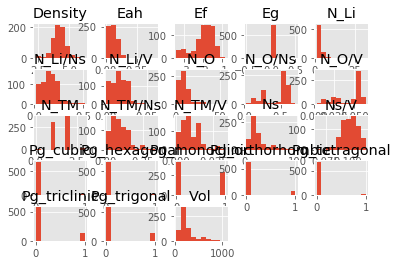

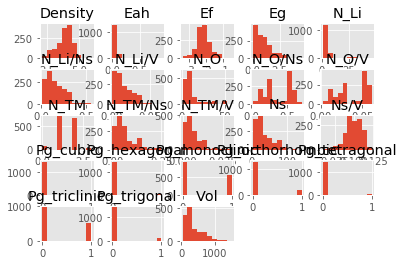

In [136]:
plt.figure(figsize=(12,12))
data.groupby(["Conductivity"]).hist()

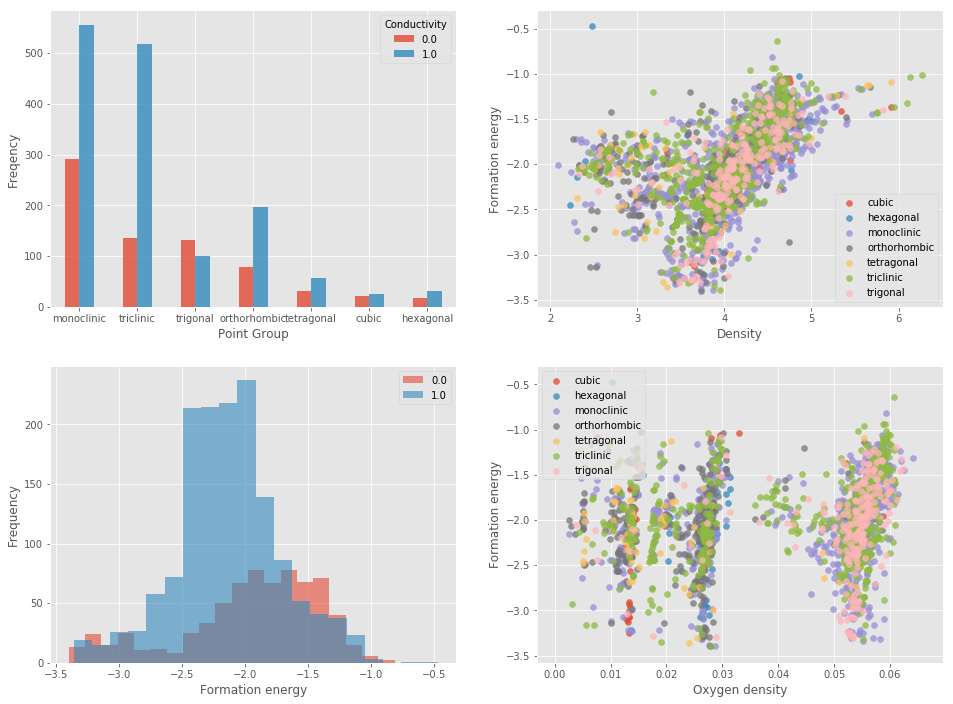

In [175]:
df_pg = data[["Pg", "N_O/V", "Density", "Conductivity", 'Ef']]

point_group_c = df_pg.groupby(["Pg"], sort=False)["Conductivity"].value_counts().unstack().sort_values(0, ascending=False)
point_group_f = df_pg.groupby(["Pg"])

fig, ax = plt.subplots(2,2, figsize=(16,12))

## fig.1
point_group_c.plot(kind="bar", ax=ax[0,0], rot=0, alpha=0.8)
ax[0,0].set(xlabel="Point Group", ylabel="Freqency")

## fig.2
keys = []
for i, (key, group) in enumerate(point_group_f):
    keys.append(key)
    ax[0,1].set_xlabel('Density')
    ax[0,1].set_ylabel('Formation energy')
    ax[0,1].scatter(group['Density'], group['Ef'], alpha=0.75, label=key)
    ax[0,1].legend()
    
## fig.3
df_pg.groupby(["Conductivity"])["Ef"].plot.hist(alpha=0.6, ax=ax[1,0], bins=20)
ax[1,0].set(xlabel="Formation energy")
ax[1,0].legend()

## fig.4
keys = []
for i, (key, group) in enumerate(point_group_f):
    keys.append(key)
    ax[1,1].set_xlabel('Oxygen density')
    ax[1,1].set_ylabel('Formation energy')
    ax[1,1].scatter(group['N_O/V'], group['Ef'], alpha=0.75, label=key)
    ax[1,1].legend()

plt.show()
#point_group_f.sort_values()

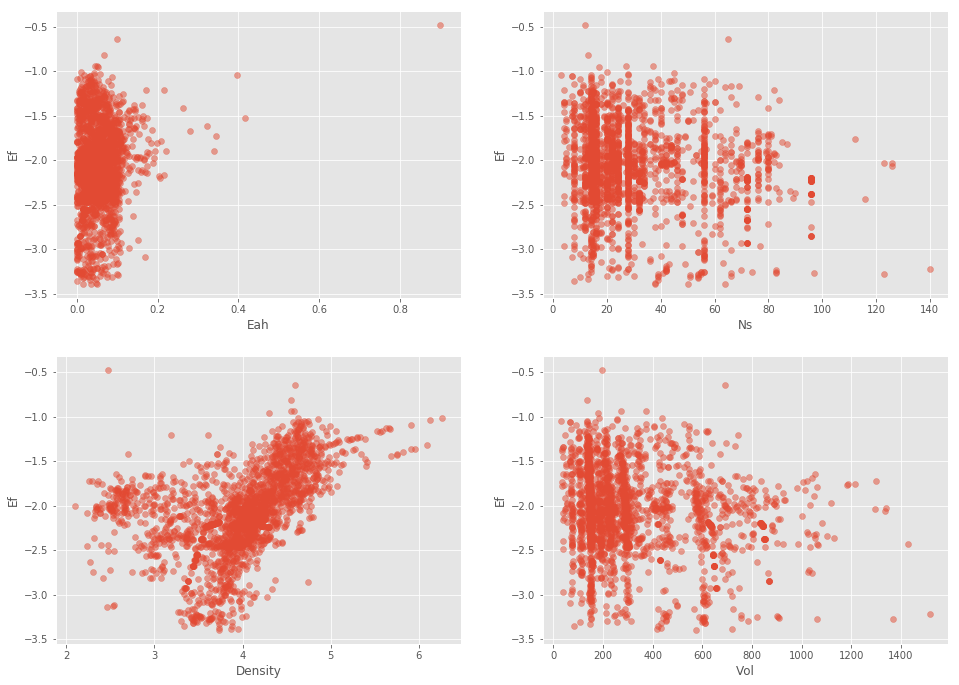

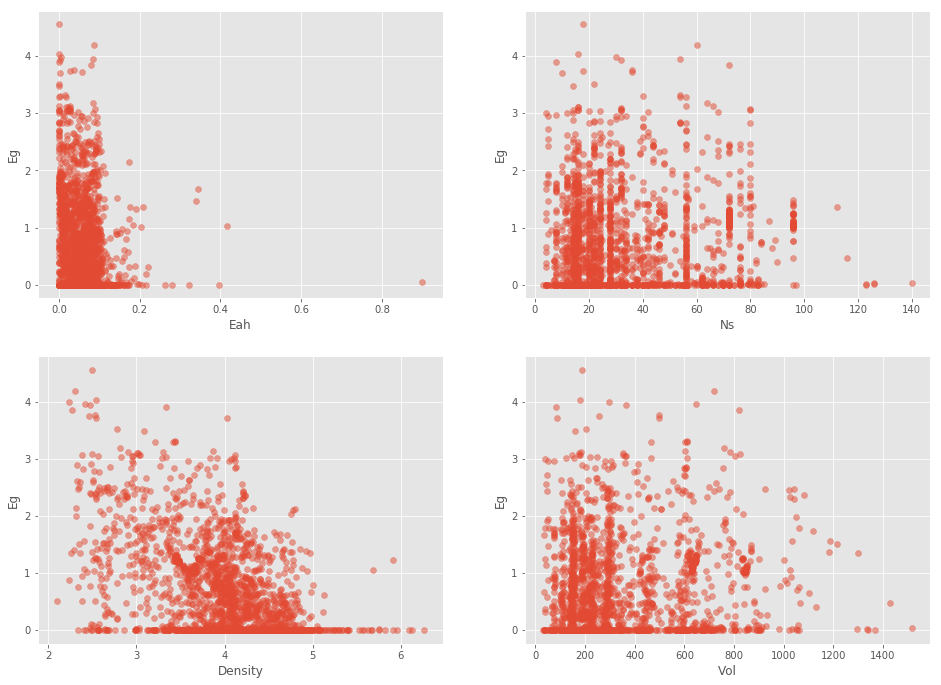

In [219]:
## Start from a simple linear regression with original dataset
from sklearn.model_selection import train_test_split

def plot_xy(data, x_name, y_name):
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.scatter(data[x_name], data[y_name], alpha=0.5)
    
def plot_features(data, features, y_name, n):
    fig = plt.figure(figsize=(16,6*(n//2+1)))
    for i in range(n):
        a = str(n//2+1)+'2'+str(i+1)
        plt.subplot(a)
        plot_xy(data, features[i], y_name)
    plt.show()

features = ["Eah", "Ns", "Density", "Vol"]

plot_features(origin, features, "Ef", 4)
plot_features(origin, features, "Eg", 4)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(
    origin[features], origin["Ef"], test_size=0.1, random_state=99)

def opt_model(X, y, model, params, cv_search):
    '''
    model: any ml models;
    params: parameters corresponding to the model;
    cv_search: cross validation searching method;
    '''
    if cv_search == "GridSearchCV":
        method = dcv.GridSearchCV(model,
                            param_grid=params, 
                            scoring="neg_mean_squared_error",
                            cv=4,
                            n_jobs=8,
                            return_train_score=False)
    
    elif cv_search == "RandomizedSearchCV":
        method = dcv.RandomizedSearchCV(model, 
                            param_distributions=params,
                            scoring="neg_mean_squared_error",
                            cv=4,
                            n_iter=25,
                            n_jobs=8,
                            return_train_score=False)
         
    opt = method.fit(X, y)
    return opt

model = Pipeline([('poly', PolynomialFeatures()), 
                  ('ridge', linear_model.Ridge(tol=0.0001))])
param_grid = dict(poly__degree=[1, 2, 3], ridge__alpha=[0.01, 0.1, 1, 10, 100])
with ProgressBar():
    prr = opt_model(X_train, y_train, model, param_grid, "GridSearchCV")

[########################################] | 100% Completed |  0.6s


In [265]:
results = pd.DataFrame(prr.cv_results_).sort_values(["rank_test_score"])
display(results.head())
print("Best models:", prr.best_estimator_)
print("Training MSE: {:.6f}".format(abs(prr.best_score_)))
print("Test MSE: {:.6f}".format(mean_squared_error(prr.best_estimator_.predict(X_test), y_test)))

,mean_fit_time,mean_score_time,mean_test_score,param_poly__degree,param_ridge__alpha,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,std_fit_time,std_score_time,std_test_score
11,0.023550,0.002575,-0.122463,3,0.1,"{u'poly__degree': 3, u'ridge__alpha': 0.1}",1,-0.124157,-0.118997,-0.116795,-0.129900,0.005079,0.000675,0.005056
12,0.023605,0.002130,-0.131682,3,1,"{u'poly__degree': 3, u'ridge__alpha': 1}",2,-0.133337,-0.124846,-0.126299,-0.142242,0.004166,0.000606,0.006890
14,0.023928,0.003253,-0.133974,3,100,"{u'poly__degree': 3, u'ridge__alpha': 100}",3,-0.135497,-0.124917,-0.130145,-0.145334,0.003796,0.001672,0.007549
13,0.024137,0.002598,-0.134609,3,10,"{u'poly__degree': 3, u'ridge__alpha': 10}",4,-0.136736,-0.126579,-0.129409,-0.145709,0.004165,0.001088,0.007402
6,0.010176,0.001366,-0.135711,2,0.1,"{u'poly__degree': 2, u'ridge__alpha': 0.1}",5,-0.143118,-0.122212,-0.134281,-0.143218,0.003325,0.000195,0.008594


Best models: Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.0001))])
Training MSE: 0.122463
Test MSE: 0.149939
